In [67]:
import matplotlib
print('Matplotlib version: ', matplotlib.__version__)
from matplotlib import pyplot as plt
import pickle
print('Pickle version: ', pickle.format_version)
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
print('NumPy version: ', np.__version__)
from sklearn.decomposition import TruncatedSVD

Matplotlib version:  3.6.1
Pickle version:  4.0
NumPy version:  1.23.4


In [68]:
# Apply fonction using list of unique tickets and the carts_endoded df
tickets_items_list = pickle.load(open("items_list_for_ticket.txt", "rb"))

# Vectorize each string and return all vectors and feature names
cv = CountVectorizer(token_pattern=r"[^\,\ ]+", lowercase=False)
def prepSparseMatrix(list_of_str):
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix, cv.get_feature_names_out()


sparseMatrix, feature_names = prepSparseMatrix(tickets_items_list)

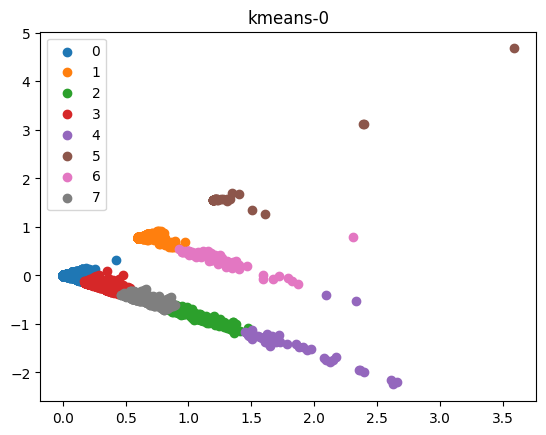

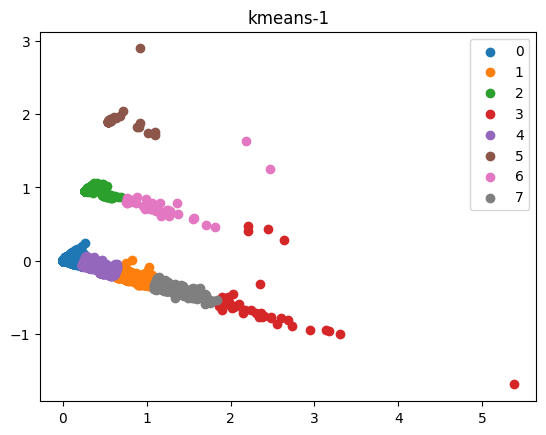

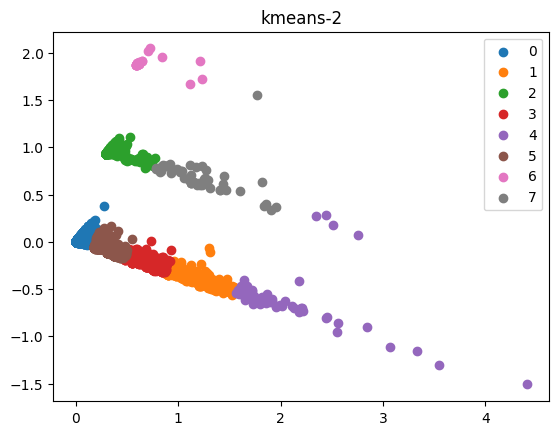

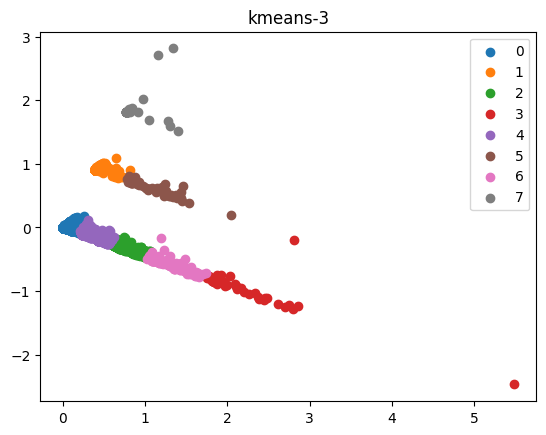

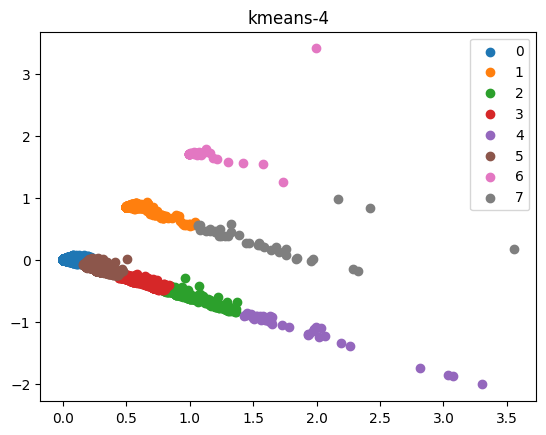

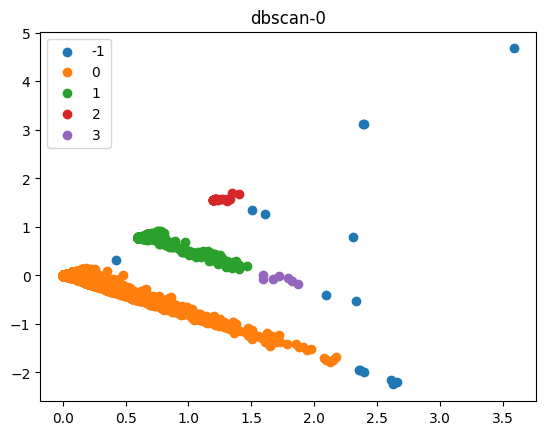

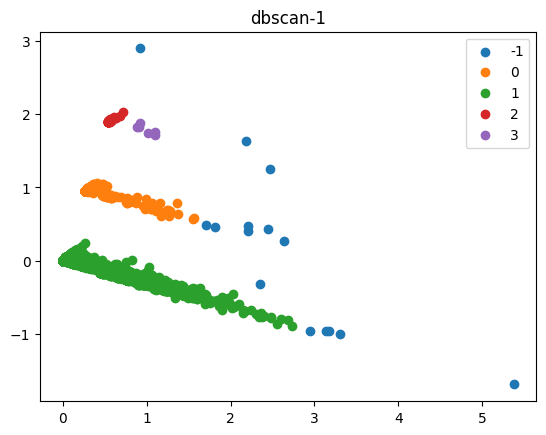

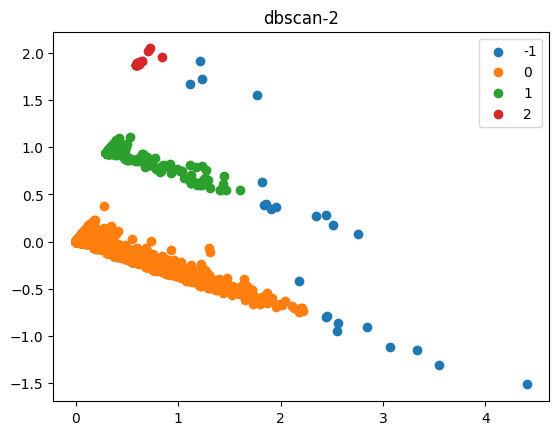

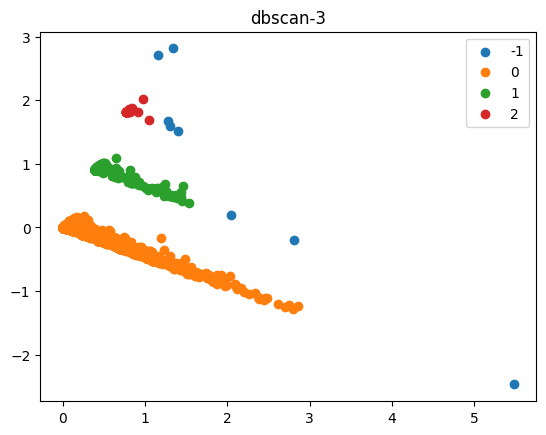

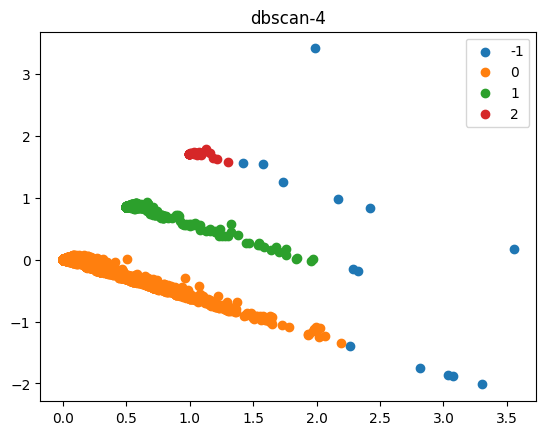

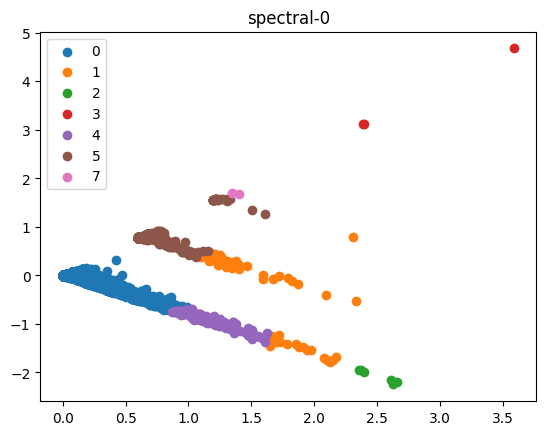

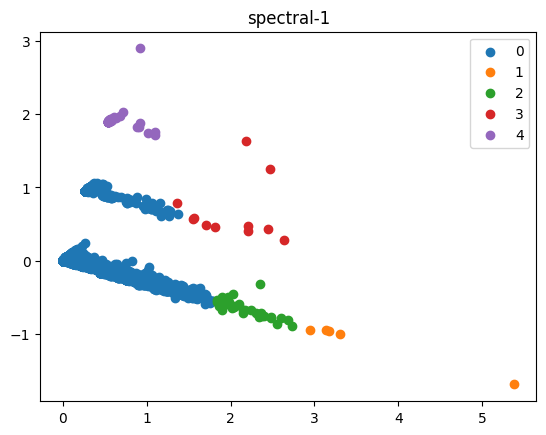

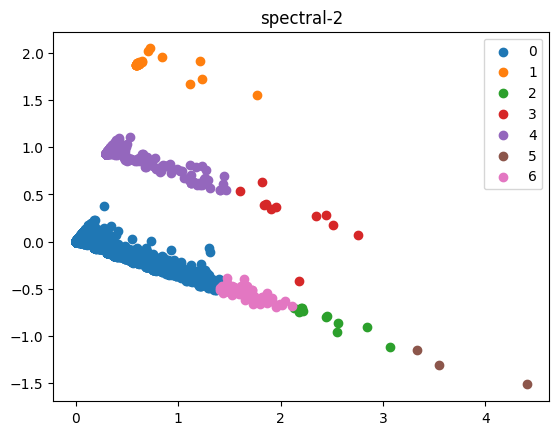

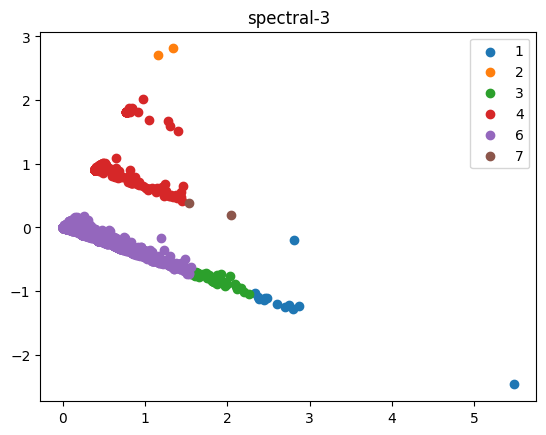

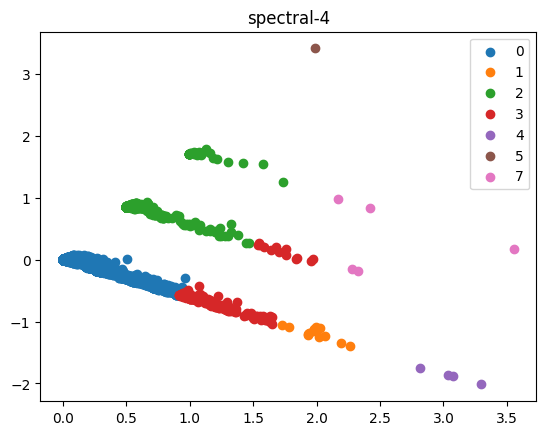

In [71]:
svd = TruncatedSVD()
models = ["kmeans", "dbscan", "spectral"]
for m in models:
    for i in range (0,5):
        df_svd = svd.fit_transform(sparseMatrix[i * 10000 : (i + 1) * 10000])
        model = pickle.load(open(f'models/{m}/{i}.pkl', 'rb'))
        clusters = model.labels_
        for u in np.unique(clusters):
            filtered_label = df_svd[clusters == u]
            plt.scatter(df_svd[clusters == u , 0] , df_svd[clusters == u , 1] , label = u)
            plt.title(f"{m}-{i}")
        plt.legend()
        plt.show()